# Simple example of svm code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm

[0]
[1]
[ 0.1380943   0.24462418]


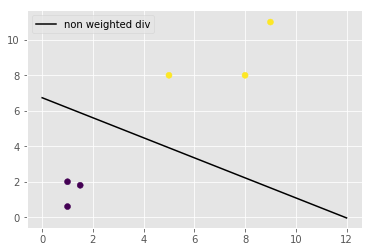

In [5]:
X = np.array([[1,2],
             [5,8],
             [1.5,1.8],
             [8,8],
             [1,0.6],
             [9,11]])
y = [0,1,0,1,0,1]
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X,y)
print(clf.predict([[0.58,0.76]]))
print(clf.predict([[10.58,10.76]]))
w = clf.coef_[0]
print(w)

a = -w[0] / w[1]

xx = np.linspace(0,12)
yy = a * xx - clf.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.legend()
plt.show()

# try reading out data on 2 feature 3-class SVM classification

In [25]:
f=open('bigram_100p_train/comp_tlc_3cl.csv','r').read().split('\n')
data=np.array([[float(l.split(',')[0]),float(l.split(',')[1])] for l in f[1:-1]])
labels=[l.split(',')[-1] for l in f[1:-1]]

In [31]:
clf = svm.SVC(C = 1.0)
clf.fit(data,labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
from sklearn.metrics import accuracy_score
y_pred=clf.predict(data)

In [33]:
y_pred

array(['SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP',
       'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP',
       'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP',
       'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP',
       'SP', 'AMB', 'AMB', 'SP', 'SP', 'AMB', 'GD', 'SP', 'AMB', 'SP',
       'SP', 'GD', 'SP', 'GD', 'SP', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD',
       'AMB', 'GD', 'GD', 'GD', 'GD', 'AMB', 'GD', 'GD', 'GD', 'GD', 'GD',
       'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD',
       'GD', 'GD', 'GD', 'GD', 'GD', 'AMB', 'GD', 'GD', 'GD', 'GD', 'GD',
       'GD', 'GD', 'GD', 'GD'], 
      dtype='|S3')

In [34]:
accuracy_score(labels,y_pred)

0.82352941176470584

# trying Decision tree on the same data set

In [35]:
#motivating example
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [36]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [38]:
#real thing
clf = tree.DecisionTreeClassifier()
clf = clf.fit(data, labels)
y_pred=clf.predict(data)
accuracy_score(labels,y_pred)

1.0

In [39]:
y_pred

array(['SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP',
       'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP',
       'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP',
       'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'SP', 'AMB',
       'AMB', 'AMB', 'AMB', 'AMB', 'AMB', 'AMB', 'AMB', 'AMB', 'AMB',
       'AMB', 'AMB', 'AMB', 'AMB', 'AMB', 'AMB', 'AMB', 'AMB', 'AMB', 'GD',
       'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD',
       'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD',
       'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD', 'GD',
       'GD', 'GD', 'GD', 'GD', 'GD', 'GD'], 
      dtype='|S3')

## next:
 1. cross validation
 2. dev-set/test-set
 3. using the pooled data set